# Battle of Neighborhoods - Final Project

## Scarborough, Canada

### Housing Prices and Schools' Rating

For the aim of this project, Scarborough as a popular destination for immigrants to the city of Toronto is selected.

The projects aim to create an analysis of features for a neighborhood or a comparative analysis between neighborhoods with just sending out the names of the neighborhoods. The features include like population rate, median house price, school ratings, crime rates, weather conditions, recreational facilities. This would help people to get awareness of the places before moving to a new country, state, city or place for their work or to start a new life

This Project would help users take a better decision on choosing the best neighborhood out of many neighborhoods to move into NewYork city based on the distribution of various facilities in and around that neighborhood.

### Python packages and Dependencies


In [1]:
import json # library to handle JSON files
import xml
import requests
import pandas as pd #Python library data manipulation and analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
%matplotlib inline

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import warnings
warnings.filterwarnings("ignore")

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will

### Import Data

In [2]:
# The code was removed by Watson Studio for sharing.

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [3]:
scarborough_data = df[df['Borough'] == 'Scarborough'].reset_index(drop=True)
scarborough_data = scarborough_data[scarborough_data['Neighborhood'] != 'Upper Rouge']
scarborough_data

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [4]:
address = 'Scarborough, Toronto, Ontario, Canada'

geolocator = Nominatim(user_agent="torono_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Scarborough are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Scarborough are 43.773077, -79.257774.


### The Map of Scarborough, Canada

In [5]:
# create map of Scarborough using latitude and longitude values
map_Scarborough = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, nei in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Scarborough)  
    
map_Scarborough

In [6]:
# The code was removed by Watson Studio for sharing.

In [7]:
address = 'Scarborough, Toronto'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_n1 = location.latitude
longitude_n1 = location.longitude
print('The geograpical coordinate of neighborhood_1 are {}, {}.'.format(latitude_n1, longitude_n1))

The geograpical coordinate of neighborhood_1 are 43.773077, -79.257774.


In [89]:
radius = 300 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)


In [90]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Nearby Venues

In [127]:
results = requests.get(url).json()
venues=results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Disney Store,Toy / Game Store,43.775537,-79.256833
1,SEPHORA,Cosmetics Shop,43.775017,-79.258109
2,Jimmy The Greek,Greek Restaurant,43.775112,-79.257119
3,Scarborough Town Centre,Shopping Mall,43.775237,-79.257363
4,Hot Topic,Clothing Store,43.775450,-79.257929
5,Gap,Clothing Store,43.774982,-79.257285
6,Scarborough Town Centre Food Court,Food Court,43.775058,-79.257133
7,Dollarama,Discount Store,43.775204,-79.258074
8,Forever XXI,Clothing Store,43.775492,-79.256677
9,lululemon athletica,Sporting Goods Shop,43.775517,-79.258423


In [92]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [93]:
scarborough_venues = getNearbyVenues(names=scarborough_data['Neighborhood'],
                                   latitudes=scarborough_data['Latitude'],
                                   longitudes=scarborough_data['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West


### Categories of Nearby Venues

### Top 10 Categories

In [94]:
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Clothing Store      4
Cosmetics Shop      2
Food Court          1
Shopping Mall       1
Discount Store      1
Bus Station         1
Toy / Game Store    1
Restaurant          1
Women's Store       1
Video Game Store    1
Name: categories, dtype: int64

In [95]:
scarborough_venues.head(3)
print(scarborough_venues.groupby('Neighborhood').count()[:4])

                                                    Neighborhood Latitude  \
Neighborhood                                                                
Agincourt                                                               5   
Agincourt North, L'Amoreaux East, Milliken, Ste...                      2   
Birch Cliff, Cliffside West                                             4   
Cedarbrae                                                               7   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Agincourt                                                                5   
Agincourt North, L'Amoreaux East, Milliken, Ste...                       2   
Birch Cliff, Cliffside West                                              4   
Cedarbrae                                                                7   

                                                    Venue  Venue Lat

In [96]:

print('There are {} uniques categories.'.format(len(scarborough_venues['Venue Category'].unique())))
scarborough_venues.groupby('Neighborhood').count().head()

There are 51 uniques categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",2,2,2,2,2,2
"Birch Cliff, Cliffside West",4,4,4,4,4,4
Cedarbrae,7,7,7,7,7,7
"Clairlea, Golden Mile, Oakridge",10,10,10,10,10,10


### Analyze Each Neighborhood

### One Hot Encoding of Features

In [97]:
# one hot encoding
Scarborough_onehot = pd.get_dummies(scarborough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Scarborough_onehot['Neighborhood'] = scarborough_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Scarborough_onehot.columns[-1]] + list(Scarborough_onehot.columns[:-1])
Scarborough_onehot = Scarborough_onehot[fixed_columns]
Scarborough_onehot.head()

,Neighborhood,American Restaurant,Athletics & Sports,Bakery,Bank,Bar,Breakfast Spot,Bus Line,Bus Station,Café,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,College Stadium,Convenience Store,Department Store,Discount Store,Electronics Store,Fast Food Restaurant,Fried Chicken Joint,Gaming Cafe,General Entertainment,Grocery Store,Hakka Restaurant,Hobby Shop,Indian Restaurant,Intersection,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lounge,Medical Center,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Motel,Moving Target,Noodle House,Park,Pet Store,Pharmacy,Pizza Place,Playground,Rental Car Location,Sandwich Place,Skating Rink,Smoke Shop,Soccer Field,Spa,Thai Restaurant,Vietnamese Restaurant
0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Highland Creek, Rouge Hill, Port Union",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Highland Creek, Rouge Hill, Port Union",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
# Size of Scarborough_onehot
Scarborough_onehot.shape

(84, 52)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [99]:
Scarborough_grouped = Scarborough_onehot.groupby('Neighborhood').mean().reset_index()
#Scarborough_onehot.head()

In [100]:
#the new size
Scarborough_grouped.shape

(16, 52)

### Let's print each neighborhood along with the top 5 most common venues

In [101]:
num_top_venues = 5
for hood in Scarborough_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp =Scarborough_grouped[Scarborough_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                venue  freq
0              Lounge   0.2
1      Breakfast Spot   0.2
2        Skating Rink   0.2
3      Sandwich Place   0.2
4  Chinese Restaurant   0.2


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                       venue  freq
0                       Park   0.5
1                 Playground   0.5
2        American Restaurant   0.0
3  Latin American Restaurant   0.0
4         Light Rail Station   0.0


----Birch Cliff, Cliffside West----
                   venue  freq
0           Skating Rink  0.25
1                   Café  0.25
2  General Entertainment  0.25
3        College Stadium  0.25
4    American Restaurant  0.00


----Cedarbrae----
                  venue  freq
0                Bakery  0.14
1                  Bank  0.14
2       Thai Restaurant  0.14
3    Athletics & Sports  0.14
4  Caribbean Restaurant  0.14


----Clairlea, Golden Mile, Oakridge----
          venue  freq
0        Bakery   0.2
1      Bus Line   0.2
2  In

#### Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [102]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

### Most Common venues near the neighborhood

In [128]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Scarborough_grouped['Neighborhood']

for ind in np.arange(Scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Scarborough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Skating Rink,Sandwich Place,Breakfast Spot,Lounge,College Stadium,Grocery Store,General Entertainment,Gaming Cafe,Fried Chicken Joint
1,"Agincourt North, L'Amoreaux East, Milliken, St...",Playground,Park,Vietnamese Restaurant,Coffee Shop,Grocery Store,General Entertainment,Gaming Cafe,Fried Chicken Joint,Fast Food Restaurant,Electronics Store
2,"Birch Cliff, Cliffside West",College Stadium,General Entertainment,Skating Rink,Café,Vietnamese Restaurant,Hakka Restaurant,Grocery Store,Gaming Cafe,Fried Chicken Joint,Fast Food Restaurant
3,Cedarbrae,Thai Restaurant,Athletics & Sports,Bakery,Bank,Hakka Restaurant,Caribbean Restaurant,Fried Chicken Joint,Department Store,Hobby Shop,Grocery Store
4,"Clairlea, Golden Mile, Oakridge",Bakery,Bus Line,Intersection,Soccer Field,Bus Station,Fast Food Restaurant,Park,Metro Station,Convenience Store,Grocery Store


### Cluster Neighborhoods
#### k-means Clustering

In [107]:
# set number of clusters
n_clusters = 4
# Using k-means to cluster the neighborhood into 4 clusters.

Scarborough_grouped_clustering = Scarborough_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters, random_state=0).fit(Scarborough_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 2], dtype=int32)

In [108]:
# The code was removed by Watson Studio for sharing.

In [129]:
# add clustering labels

Scarborough_merged = scarborough_data
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge Scarborough_grouped with Scarborough_data to add latitude/longitude for each neighborhood
Scarborough_merged = Scarborough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

#Scarborough_merged['Cluster Labels'] = np.array([int(x) if int(x) == x else x for x in Scarborough_merged['Cluster Labels']], dtype=object)
#If possible missing values
Scarborough_merged['Cluster Labels'] = np.array([int(x) if x % 1 == 0 else x for x in Scarborough_merged['Cluster Labels']], dtype=object)
Scarborough_merged.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3,Fast Food Restaurant,Vietnamese Restaurant,College Stadium,Hakka Restaurant,Grocery Store,General Entertainment,Gaming Cafe,Fried Chicken Joint,Electronics Store,Discount Store
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,1,Moving Target,Bar,Vietnamese Restaurant,Hakka Restaurant,Grocery Store,General Entertainment,Gaming Cafe,Fried Chicken Joint,Fast Food Restaurant,Electronics Store
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,1,Intersection,Spa,Rental Car Location,Breakfast Spot,Pizza Place,Electronics Store,Medical Center,Mexican Restaurant,College Stadium,General Entertainment
3,M1G,Scarborough,Woburn,43.770992,-79.216917,2,Coffee Shop,Korean Restaurant,Pharmacy,College Stadium,Grocery Store,General Entertainment,Gaming Cafe,Fried Chicken Joint,Fast Food Restaurant,Electronics Store
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,1,Thai Restaurant,Athletics & Sports,Bakery,Bank,Hakka Restaurant,Caribbean Restaurant,Fried Chicken Joint,Department Store,Hobby Shop,Grocery Store


### Visualize the Resulting Clusters

In [110]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(n_clusters)
ys = [i + x + (i*x)**2 for i in range(n_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#print(rainbow)

# add markers to the map
markers_colors = []
for lat, lon, nei , cluster in zip(Scarborough_merged['Latitude'], 
                                   Scarborough_merged['Longitude'], 
                                   Scarborough_merged['Neighborhood'], 
                                   Scarborough_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    #rainbow[cluster] = np.array([int(x) if x % 1 == 0 else x for x in rainbow[cluster]], dtype=object)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [131]:
cn1 = Scarborough_merged.loc[Scarborough_merged['Neighborhood'] == 0, Scarborough_merged.columns[[0] + list(range(4, Scarborough_merged.shape[1]))]]
cl1 = Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 0, Scarborough_merged.columns[[0] + list(range(4, Scarborough_merged.shape[1]))]]
cp = cl1['Postalcode'].unique()
cp = cp.tolist()

In [132]:
cn2 = Scarborough_merged.loc[Scarborough_merged['Neighborhood'] == 1, Scarborough_merged.columns[[0] + list(range(4, Scarborough_merged.shape[1]))]]
cl2 = Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 1, Scarborough_merged.columns[[0] + list(range(4, Scarborough_merged.shape[1]))]]
cp1 = cl2['Postalcode'].unique()
cp1 = cp1.tolist()

In [133]:
cn3 = Scarborough_merged.loc[Scarborough_merged['Neighborhood'] == 2, Scarborough_merged.columns[[0] + list(range(4, Scarborough_merged.shape[1]))]]
cl3 = Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 2, Scarborough_merged.columns[[0] + list(range(4, Scarborough_merged.shape[1]))]]
cp2 = cl3['Postalcode'].unique()
cp2 = cp2.tolist()

In [134]:
cn4 = Scarborough_merged.loc[Scarborough_merged['Neighborhood'] == 3, Scarborough_merged.columns[[0] + list(range(4, Scarborough_merged.shape[1]))]]
cl4 = Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 3, Scarborough_merged.columns[[0] + list(range(4, Scarborough_merged.shape[1]))]]
cp3 = cl4['Postalcode'].unique()
cp3 = cp3.tolist()

Text(0.5,1,'Postalcodes in each Cluster in Scarborough City')

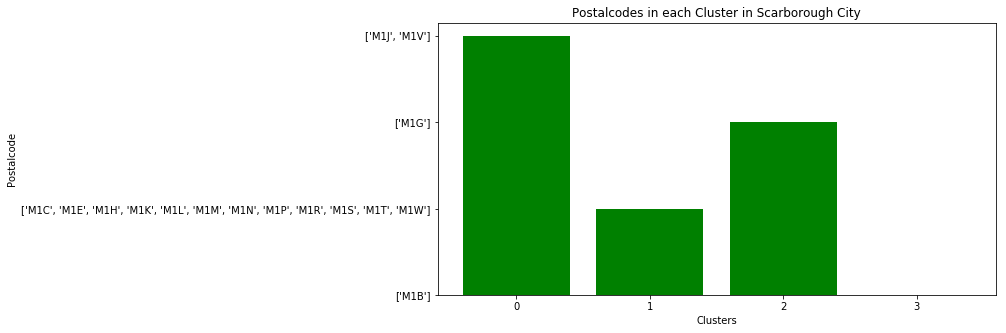

In [130]:
#Postalcodes in each Cluster in Scarborough City
CP = pd.DataFrame({"0":[cp], "1":[cp1], "2":[cp2], "3":[cp3]})
#list(CP.keys())
#list(CP.values())
#plt.plot(list(CP.keys()),list(CP.values()))

xs, ys=zip(*((str(x), k) for k in CP for x in CP[k]))
xs, ys

plt.figure(figsize=(10,5))
plt.bar(ys, xs, width=0.8, color='green')
plt.ylabel('Postalcode')
plt.xlabel('Clusters')
plt.title('Postalcodes in each Cluster in Scarborough City')

### Average Housing Prices in each Postal code

The average price of houses in each postalcode are given as follows:

In [137]:
# Computing the average house prices in each Postal code
df_p = Scarborough_merged["Postalcode"].unique()

Scarborough_Avg_HousingPrice=pd.DataFrame({"Postalcode":df_p, "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0]})
                                                              

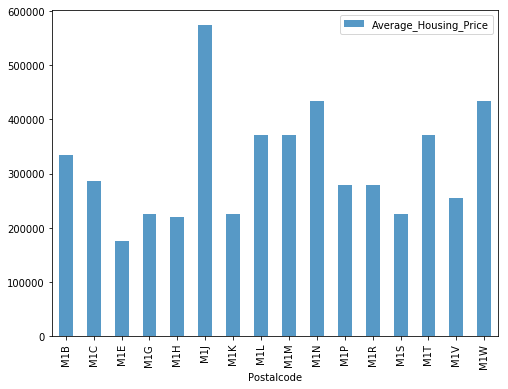

In [138]:
Scarborough_Avg_HousingPrice.set_index('Postalcode', inplace=True,drop=True)
Scarborough_Avg_HousingPrice.plot(kind='bar',figsize=(8,6),alpha=0.75)

Based on the above figure, "average house prices in each Postal code", it can be seen that the houses which are located in M1J postal code have the highest average price among the other postal code in Scarborough city. On the other hand, the houses which are located in M1E postal code have the lowest average price among the other postal code in Scarborough city.

In [139]:
# Computing the average house prices in each Neighborhood
df_n = Scarborough_merged["Neighborhood"].unique()

Scarborough_Avg_Housingprice=pd.DataFrame({"Neighborhood":df_n, "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0]})

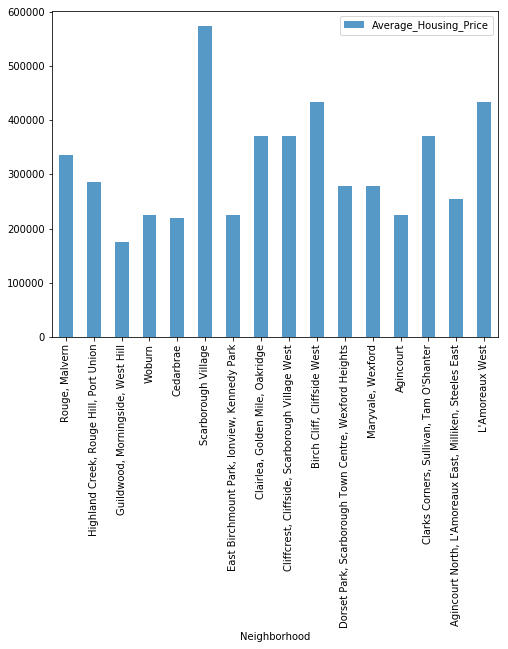

In [141]:
Scarborough_Avg_Housingprice.set_index('Neighborhood', inplace=True,drop=True)
Scarborough_Avg_Housingprice.plot(kind='bar',figsize=(8,6),alpha=0.75)

### School Rating by Clusters

The Data regards school ratings in Scarborough is given from this link: http://ontario.compareschoolrankings.org/elementary/SchoolsByRankLocationName.aspx

In [118]:
# Importing Data of the school rate >= 6 in Scarborough
body = client_42f0e60aab8a41cc8fa3e65979c3ce18.get_object(Bucket='courseracapstone-donotdelete-pr-smx0vmael2olru',Key='Scarborough_School_Rate.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Scarborough_school_ratings = pd.read_csv(body)
Scarborough_school_ratings



,Postalcode,Schoolname,Rate
0,M1B,Fleming,9.5
1,M1B,Alvin Curling,7.9
2,M1B,St Gabriel Lalemant,7.6
3,M1B,John G Diefenbaker,7.4
4,M1B,Emily Carr,7.2
5,M1B,St Jean de Brebeuf,7.2
6,M1B,Heritage Park,7.0
7,M1B,Burrows Hall,6.9
8,M1B,Berner Trail,6.5
9,M1B,St Dominic Savio,6.2


In [146]:
# Merging Scarborough_merged and Scarborough_school_ratings
Scarborough_merged = Scarborough_merged.merge(Scarborough_school_ratings)
Scarborough_merged

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Schoolname,Rate
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3,Fast Food Restaurant,Vietnamese Restaurant,College Stadium,Hakka Restaurant,Grocery Store,General Entertainment,Gaming Cafe,Fried Chicken Joint,Electronics Store,Discount Store,Fleming,9.5
1,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3,Fast Food Restaurant,Vietnamese Restaurant,College Stadium,Hakka Restaurant,Grocery Store,General Entertainment,Gaming Cafe,Fried Chicken Joint,Electronics Store,Discount Store,Alvin Curling,7.9
2,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3,Fast Food Restaurant,Vietnamese Restaurant,College Stadium,Hakka Restaurant,Grocery Store,General Entertainment,Gaming Cafe,Fried Chicken Joint,Electronics Store,Discount Store,St Gabriel Lalemant,7.6
3,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3,Fast Food Restaurant,Vietnamese Restaurant,College Stadium,Hakka Restaurant,Grocery Store,General Entertainment,Gaming Cafe,Fried Chicken Joint,Electronics Store,Discount Store,John G Diefenbaker,7.4
4,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3,Fast Food Restaurant,Vietnamese Restaurant,College Stadium,Hakka Restaurant,Grocery Store,General Entertainment,Gaming Cafe,Fried Chicken Joint,Electronics Store,Discount Store,Emily Carr,7.2
5,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3,Fast Food Restaurant,Vietnamese Restaurant,College Stadium,Hakka Restaurant,Grocery Store,General Entertainment,Gaming Cafe,Fried Chicken Joint,Electronics Store,Discount Store,St Jean de Brebeuf,7.2
6,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3,Fast Food Restaurant,Vietnamese Restaurant,College Stadium,Hakka Restaurant,Grocery Store,General Entertainment,Gaming Cafe,Fried Chicken Joint,Electronics Store,Discount Store,Heritage Park,7.0
7,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3,Fast Food Restaurant,Vietnamese Restaurant,College Stadium,Hakka Restaurant,Grocery Store,General Entertainment,Gaming Cafe,Fried Chicken Joint,Electronics Store,Discount Store,Burrows Hall,6.9
8,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3,Fast Food Restaurant,Vietnamese Restaurant,College Stadium,Hakka Restaurant,Grocery Store,General Entertainment,Gaming Cafe,Fried Chicken Joint,Electronics Store,Discount Store,Berner Trail,6.5
9,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3,Fast Food Restaurant,Vietnamese Restaurant,College Stadium,Hakka Restaurant,Grocery Store,General Entertainment,Gaming Cafe,Fried Chicken Joint,Electronics Store,Discount Store,St Dominic Savio,6.2


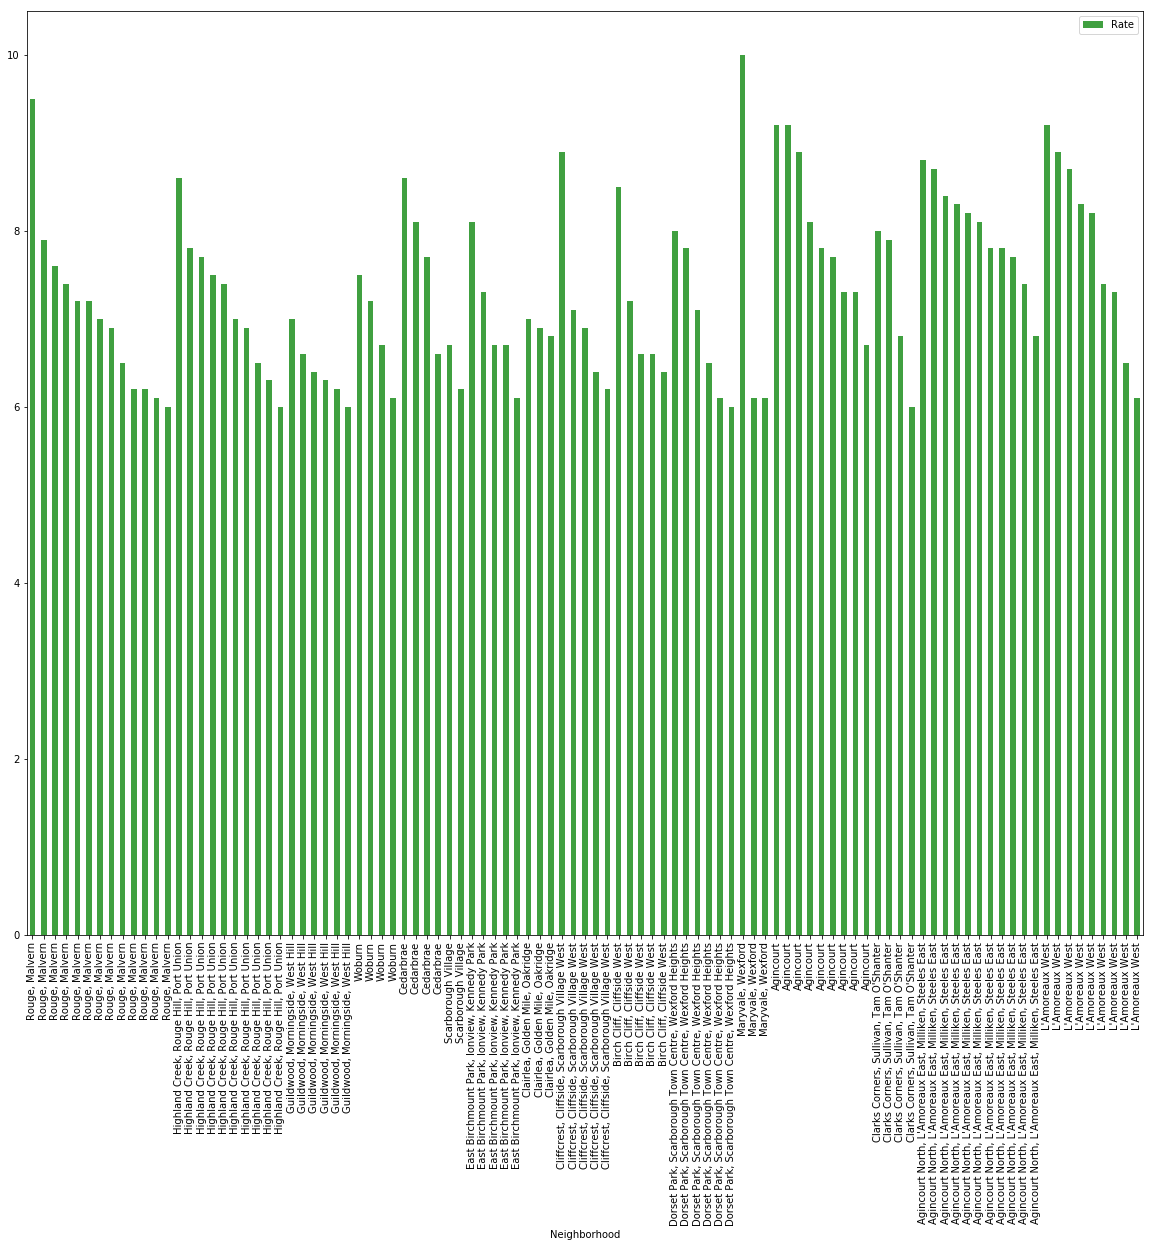

In [148]:
#School ratings in the neighborhood
Top_school = Scarborough_merged
Top_school = Top_school[['Neighborhood', 'Rate']]

Top_school.set_index('Neighborhood',inplace=True,drop=True)

Top_school.plot(kind='bar',figsize=(20,17),color='green',alpha=0.75);

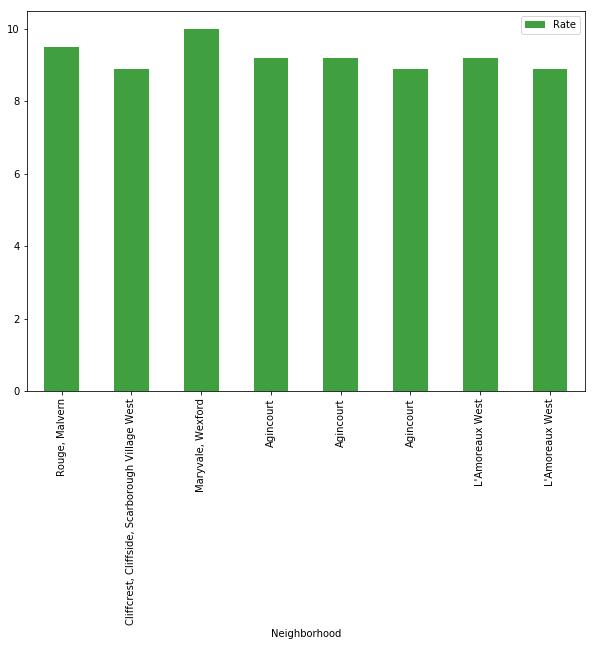

In [120]:
#Top school ratings in the neighborhood
Top_school = Scarborough_merged[Scarborough_merged['Rate']>= 8.9]
Top_school = Top_school[['Neighborhood', 'Rate']]

Top_school.set_index('Neighborhood',inplace=True,drop=True)

Top_school.plot(kind='bar',figsize=(10,7),color='green',alpha=0.75);

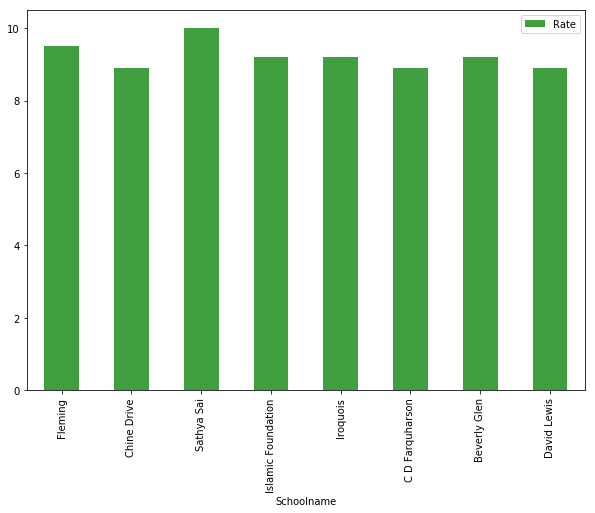

In [121]:
#Top school ratings with their names
Top_school = Scarborough_merged[Scarborough_merged['Rate']>= 8.9]
Top_school1 = Top_school[['Schoolname', 'Rate']]

Top_school1.set_index('Schoolname',inplace=True,drop=True)

Top_school1.plot(kind='bar',figsize=(10,7),color='green',alpha=0.75);

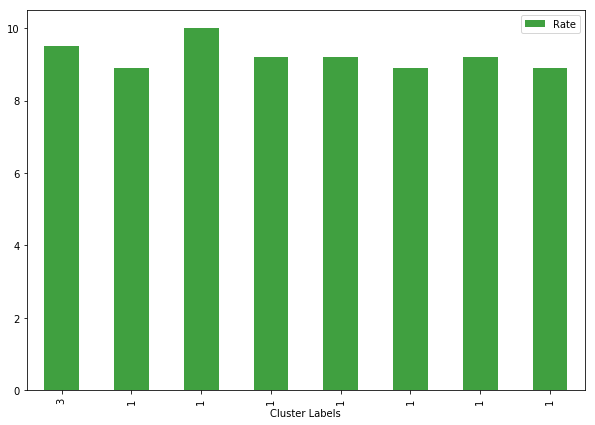

In [122]:
#Top school ratings with their clusters
Top_school = Scarborough_merged[Scarborough_merged['Rate']>= 8.9]
Top_school1 = Top_school[['Cluster Labels', 'Rate']]

Top_school1.set_index('Cluster Labels',inplace=True,drop=True)

Top_school1.plot(kind='bar',figsize=(10,7),color='green',alpha=0.75)


Text(0.5,1,'Rate of Schools in each Clusters in Scarborough City')

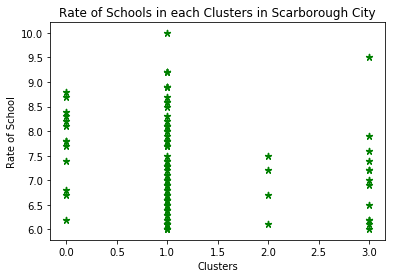

In [123]:
#school rating in each cluster
Top_school = Scarborough_merged

x = Top_school['Cluster Labels']

y = Top_school['Rate']
plt.scatter(x, y, marker=(5, 2), color='green')
plt.ylabel('Rate of School')
plt.xlabel('Clusters')
plt.title('Rate of Schools in each Clusters in Scarborough City')


Text(0.5,1,'Number of Schools with Rate of over 6 in each Postalcode in Scarborough City')

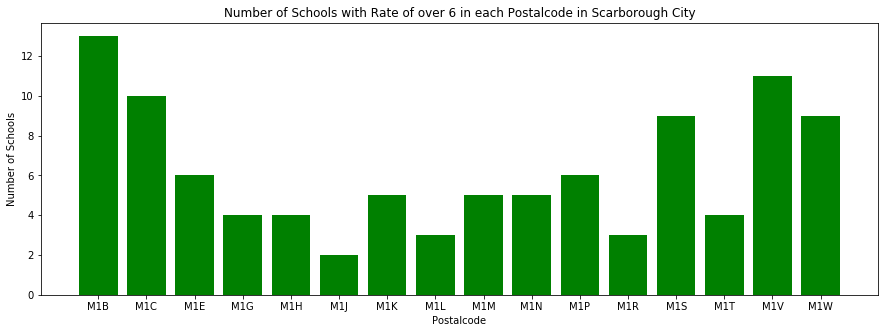

In [124]:
import collections, numpy

df_p = Scarborough_merged["Postalcode"]
a = df_p.tolist()

b = collections.Counter(a)
labels, values = zip(*b.items())
plt.figure(figsize=(15,5))
plt.bar(labels, values, width=0.8, color='green')
plt.ylabel('Number of Schools')
plt.xlabel('Postalcode')
plt.title('Number of Schools with Rate of over 6 in each Postalcode in Scarborough City')


Text(0.5,1,'Number of Schools with Rate of over 6 in each Clusters in Scarborough City')

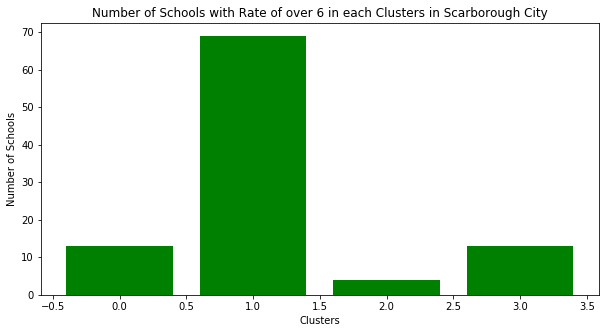

In [125]:
#Number of Schools with Rate of over 6 in each Clusters in Scarborough City
import collections, numpy

df_p = Scarborough_merged["Cluster Labels"]
a = df_p.tolist()
b = collections.Counter(a)
labels, values = zip(*b.items())
plt.figure(figsize=(10,5))
plt.bar(labels, values, width=0.8, color='green')
plt.ylabel('Number of Schools')
plt.xlabel('Clusters')
plt.title('Number of Schools with Rate of over 6 in each Clusters in Scarborough City')

### Conclusion

In this project, through a k-means clustering algorithm, we separate the neighborhood into 4 clusters, which the similar venues around them. By using the visualization techniques like the bar charts as well as the scatter plot we can find the neighborhood with affordable price of houses and high quality school rate. The average house prices in cluster 1 have the lowest amount among other clusters which makes it a good choice for the families looking for the place to live. Furthermore, the existence of the majority of high quality schools in this cluster will definitely make sure the families with kids to select this neighborhood as their home in the Scarborough City.